In [2]:
#importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import warnings

In [3]:
# Reading Data
# Load the dataset from the CSV file
df = pd.read_csv("/content/jamboree_admission.csv")

In [4]:
# Basic Data Inspection
# Checking the first few rows, last few rows, shape, and data types
print(df.head(6))  # First 6 rows
print(df.tail())  # Last 5 rows
print(f"Shape of the dataset: {df.shape}")
print(f"Info about the dataset:\n{df.info()}")

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
5         1              0.90  
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   

In [5]:
# Descriptive Statistics & Value Counts
# Get a statistical summary of the numerical columns
print(f"Statistical Summary:\n{df.describe()}")

Statistical Summary:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000 

In [6]:
#Count occurrences of categories in 'Research' and 'University Rating'
print(f"Research value counts:\n{df['Research'].value_counts()}")
print(f"University Rating value counts:\n{df['University Rating'].value_counts()}")

Research value counts:
Research
1    280
0    220
Name: count, dtype: int64
University Rating value counts:
University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64


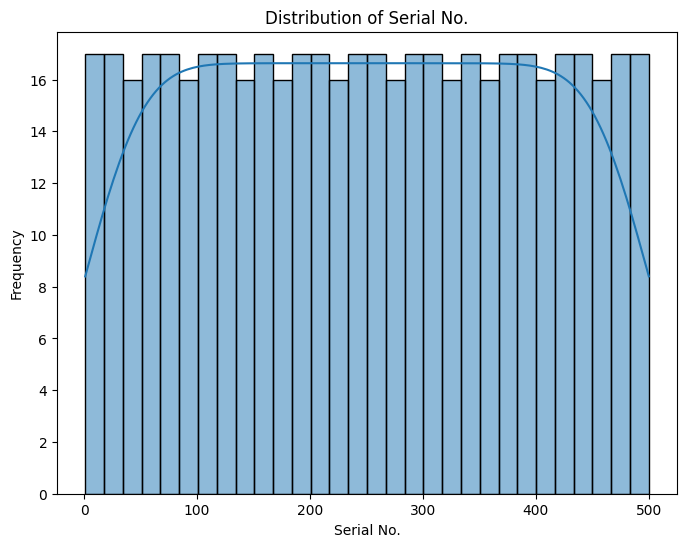

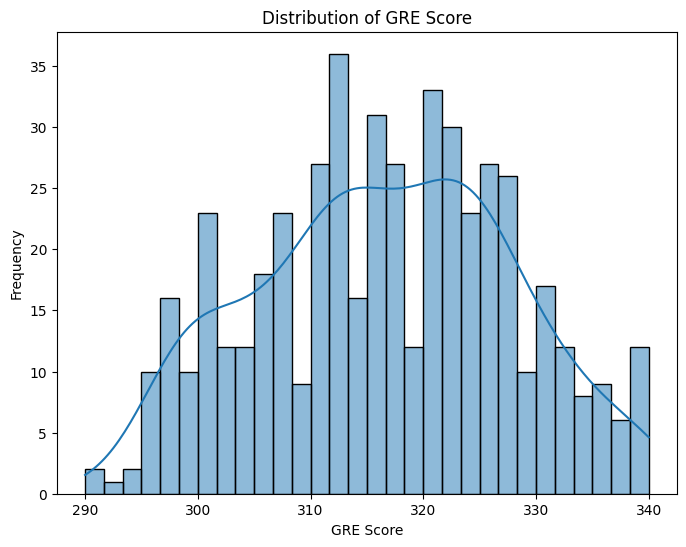

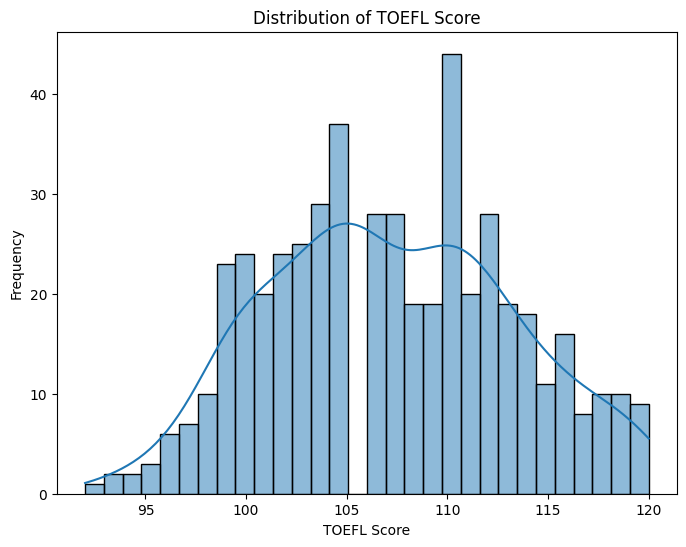

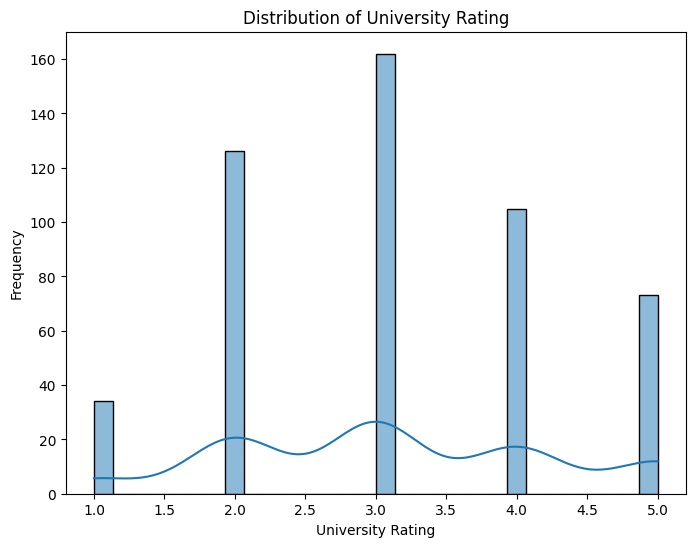

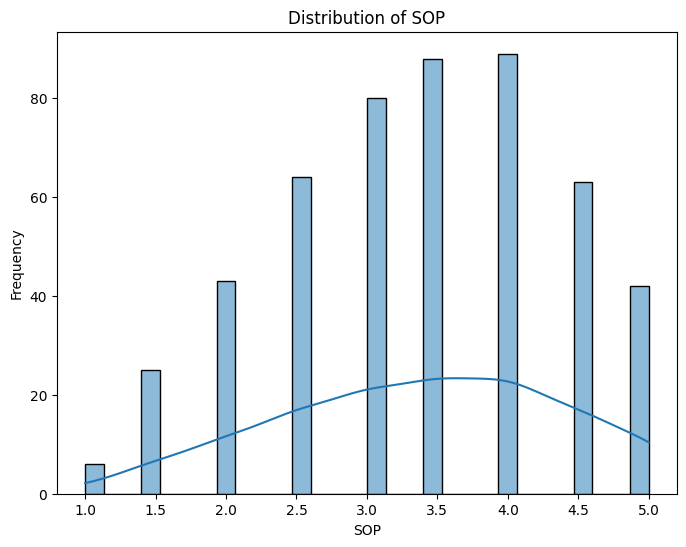

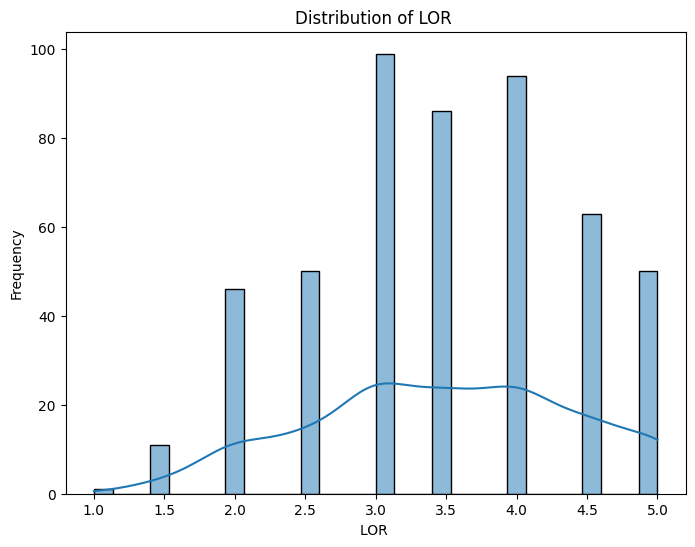

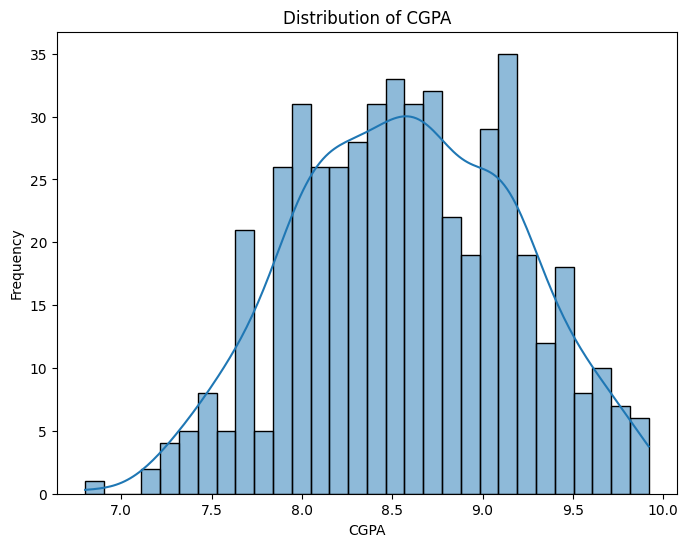

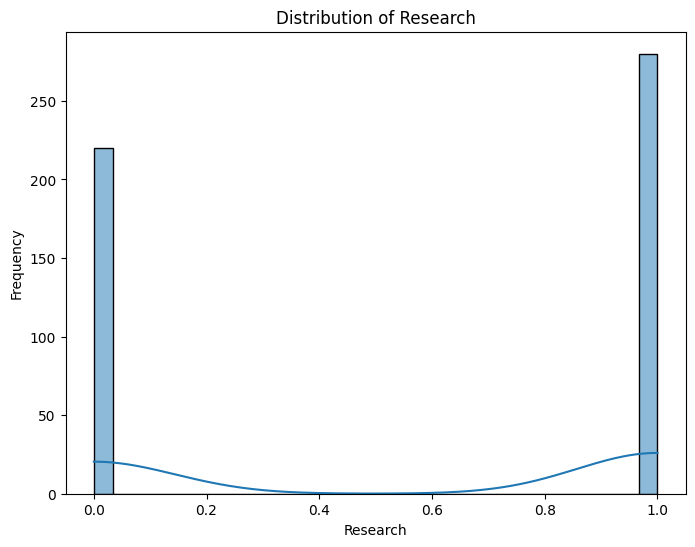

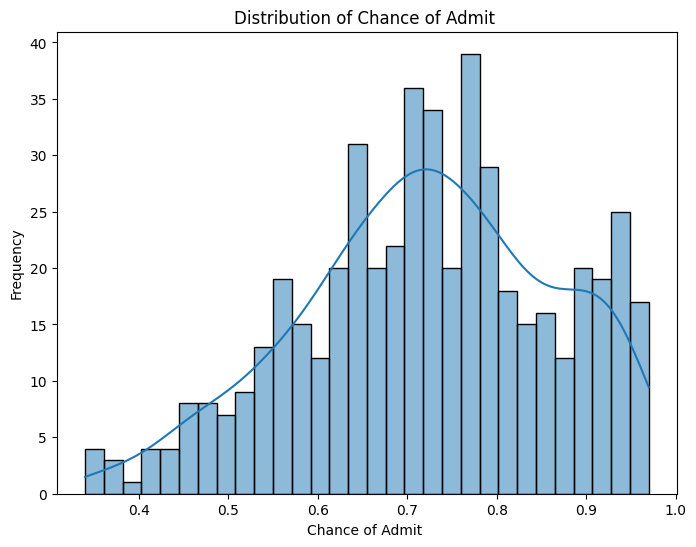

In [7]:
#Univariate & Bivariate Visualization
# Univariate Analysis: Visualize distributions of continuous variables using histograms and KDE
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

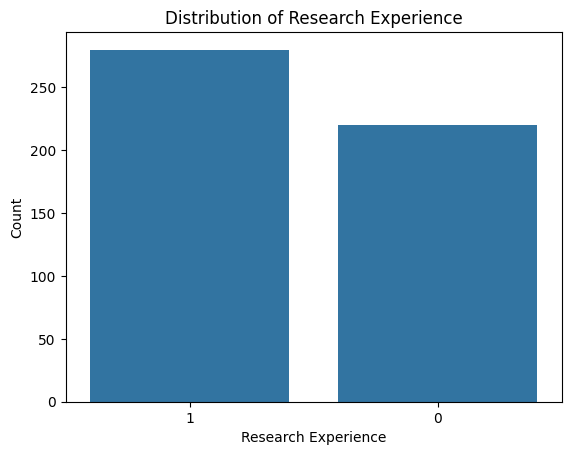

In [8]:

# Categorical Variables: Visualizing 'Research' and 'University Rating' using countplots
sns.countplot(data=df, x="Research", order=df["Research"].value_counts().index)
plt.title("Distribution of Research Experience")
plt.xlabel("Research Experience")
plt.ylabel("Count")
plt.show()

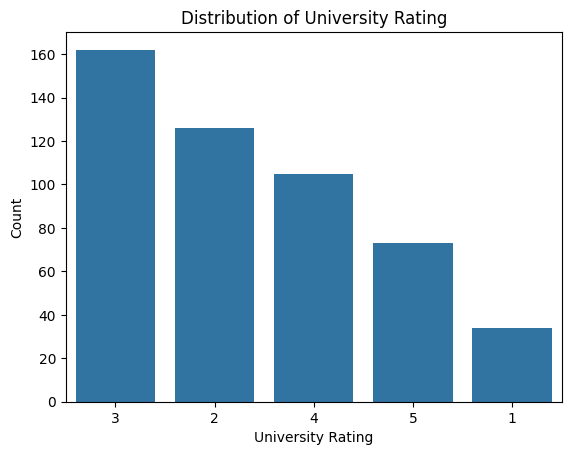

In [9]:

sns.countplot(data=df, x="University Rating", order=df["University Rating"].value_counts().index)
plt.title("Distribution of University Rating")
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

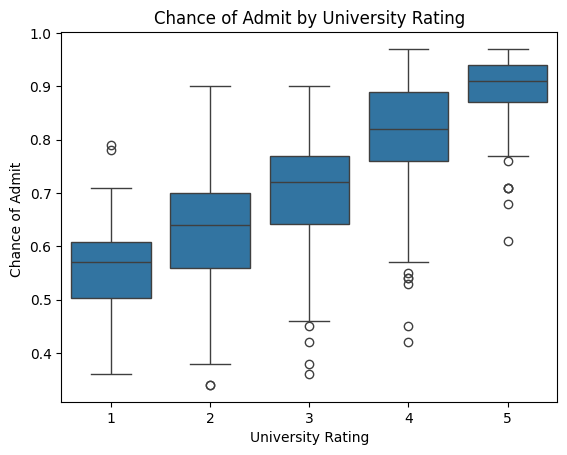

In [10]:
#Boxplots to Analyze the "Chance of Admit" by Categories
# Visualizing the 'Chance of Admit' distribution by different categorical features
sns.boxplot(data=df, x="University Rating", y="Chance of Admit ")
plt.title("Chance of Admit by University Rating")
plt.show()

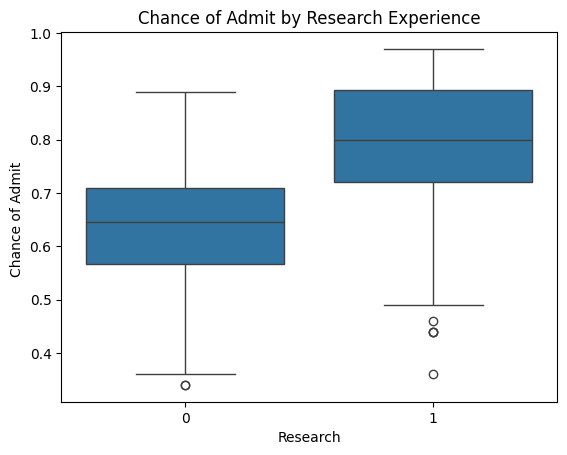

In [11]:
sns.boxplot(data=df, x="Research", y="Chance of Admit ")
plt.title("Chance of Admit by Research Experience")
plt.show()

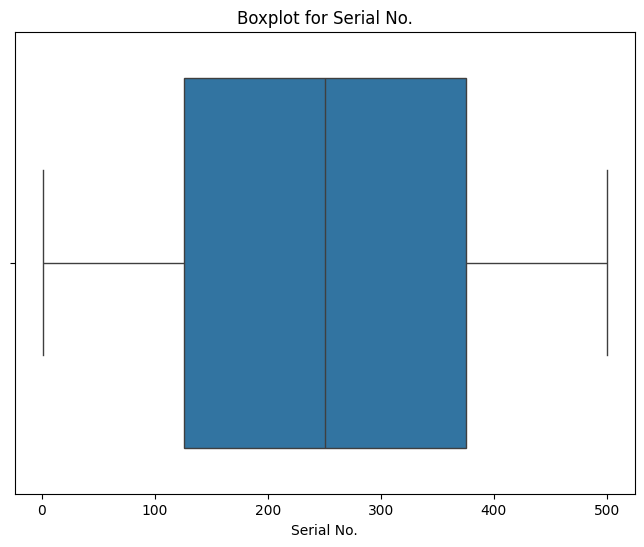

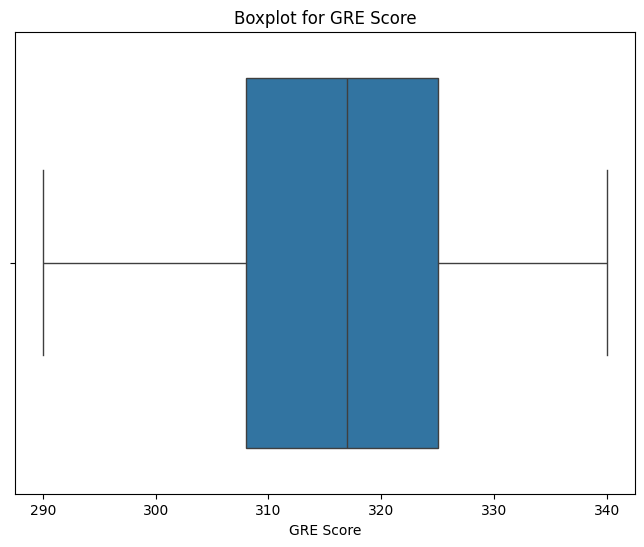

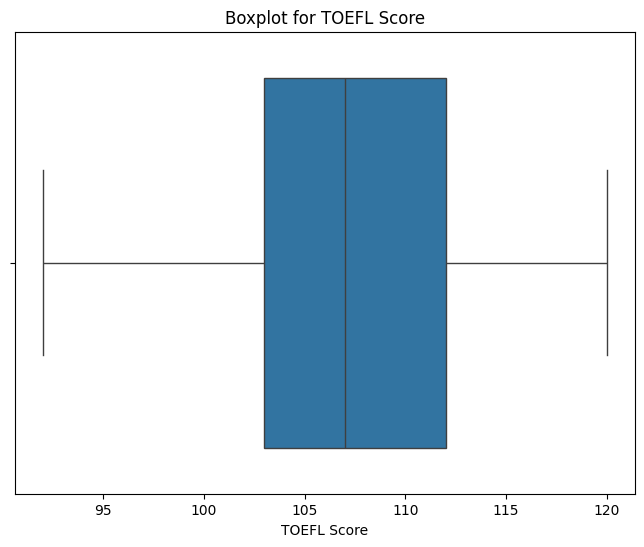

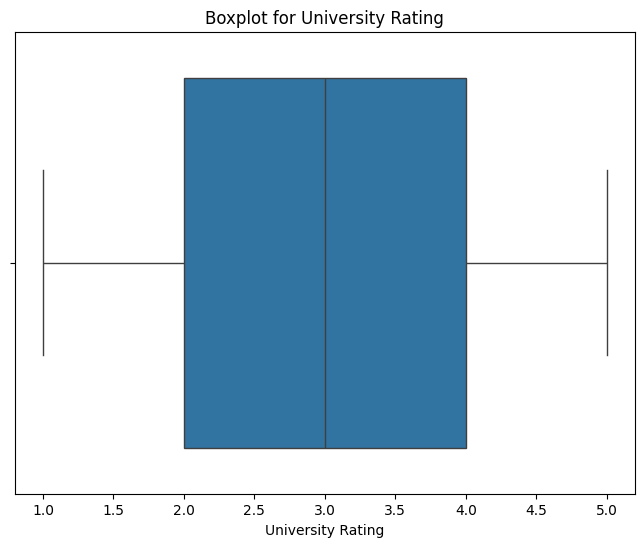

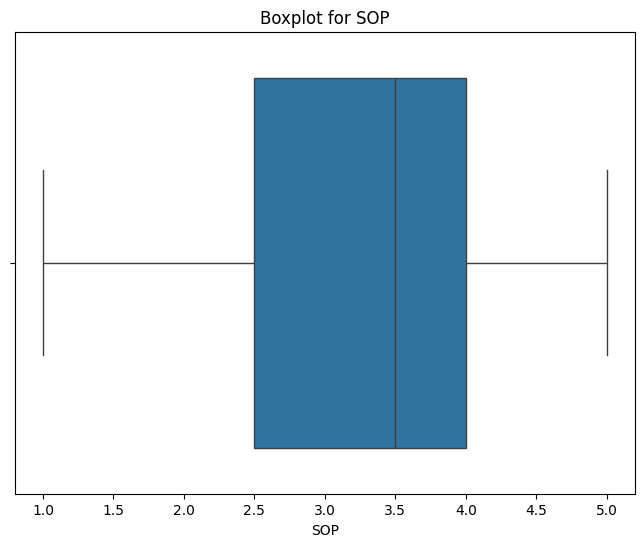

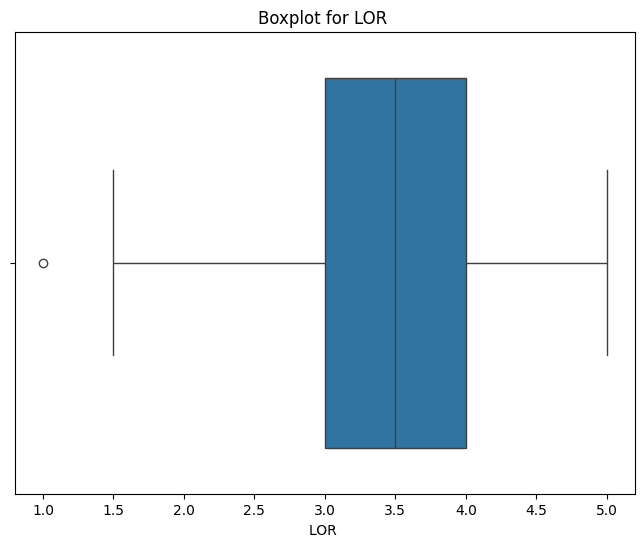

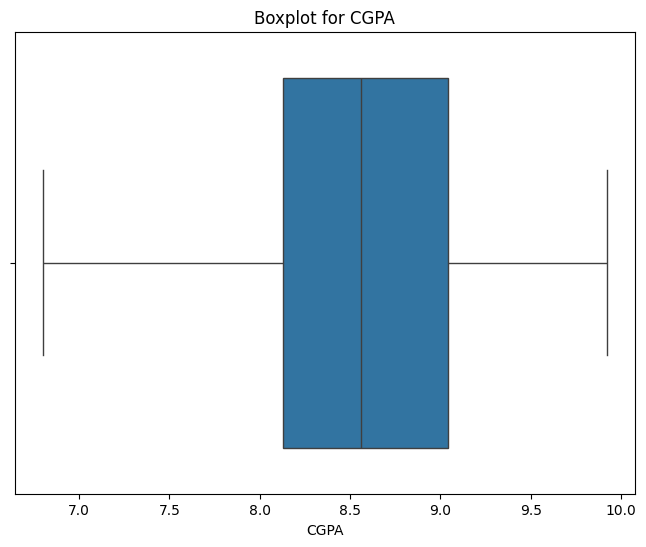

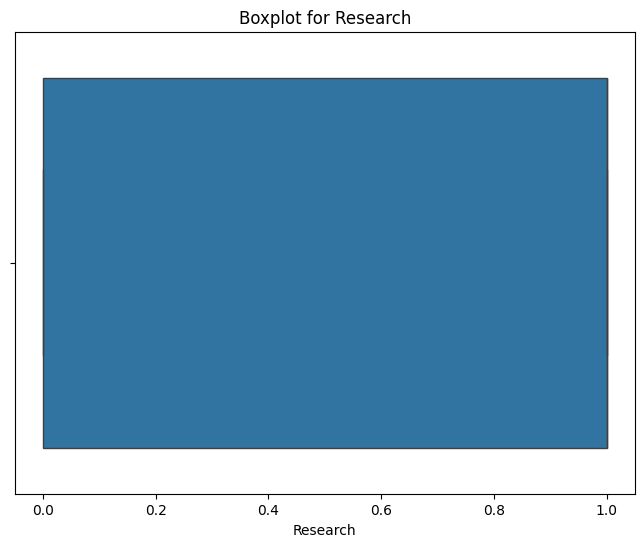

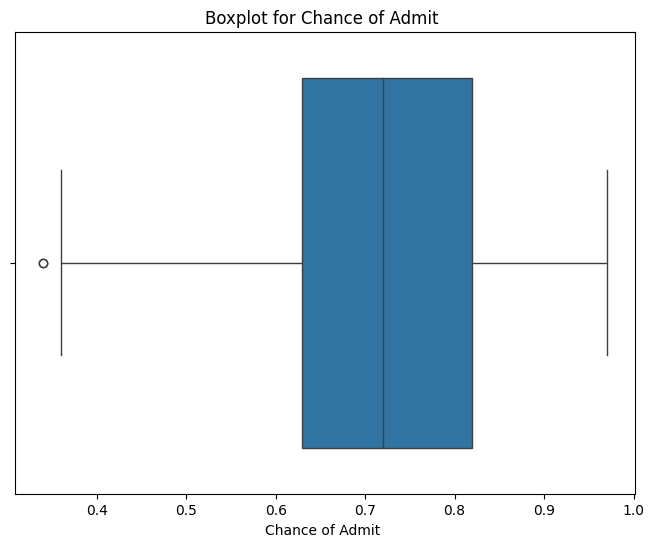

In [12]:
#Outlier Detection (Boxplots for Continuous Variables)
# Use boxplots to identify potential outliers in continuous variables
warnings.filterwarnings("ignore")  # Suppress warnings for boxplots
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [14]:
#Checking for Missing Values and Duplicates
# Check for missing values and duplicate rows in the dataset
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Missing values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Duplicate rows: 0


In [15]:
#Feature Scaling (MinMaxScaler)
# Scaling the feature columns using MinMaxScaler (excluding the target variable 'Chance of Admit')
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("Chance of Admit ", axis=1)), columns=df.columns[:-1])
df_scaled['Chance of Admit '] = df['Chance of Admit ']

In [16]:
#Train-Test Split
# Splitting the dataset into training and testing sets
X = df_scaled.drop("Chance of Admit ", axis=1)
y = df_scaled["Chance of Admit "]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (350, 8), Test shape: (150, 8)


In [18]:
#Model Training and Evaluation (Linear, Lasso, Ridge Regression)
# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

In [19]:
# Fit models to the training data
linear_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [20]:
# Print coefficients and intercepts for each model
print(f"Linear Regression Coefficients: {linear_model.coef_}")
print(f"Lasso Regression Coefficients: {lasso_model.coef_}")
print(f"Ridge Regression Coefficients: {ridge_model.coef_}")

Linear Regression Coefficients: [0.0416969  0.08638425 0.11765386 0.03658586 0.0109132  0.04517361
 0.32629763 0.0265983 ]
Lasso Regression Coefficients: [-0.  0.  0.  0.  0.  0.  0.  0.]
Ridge Regression Coefficients: [0.04165036 0.08918081 0.1186059  0.03728283 0.01242959 0.0459522
 0.31691947 0.02693133]


In [21]:
print(f"Linear Regression Intercept: {linear_model.intercept_}")
print(f"Lasso Regression Intercept: {lasso_model.intercept_}")
print(f"Ridge Regression Intercept: {ridge_model.intercept_}")

Linear Regression Intercept: 0.34050310483993235
Lasso Regression Intercept: 0.7252
Ridge Regression Intercept: 0.34194570004596025


In [22]:
# Print R-squared scores for each model on test data
print(f"Linear Regression R^2: {linear_model.score(x_test, y_test)}")
print(f"Lasso Regression R^2: {lasso_model.score(x_test, y_test)}")
print(f"Ridge Regression R^2: {ridge_model.score(x_test, y_test)}")

Linear Regression R^2: 0.8239704162441339
Lasso Regression R^2: -0.005939560521341702
Ridge Regression R^2: 0.8231160866707911


In [23]:
# Calculate Mean Squared Error (MSE) for each model
linear_train_mse = mean_squared_error(y_train, linear_model.predict(x_train))
linear_test_mse = mean_squared_error(y_test, linear_model.predict(x_test))
print(f"Linear Regression - Train MSE: {linear_train_mse}, Test MSE: {linear_test_mse}")

Linear Regression - Train MSE: 0.0032258045235764587, Test MSE: 0.003942221645897899


In [24]:
lasso_train_mse = mean_squared_error(y_train, lasso_model.predict(x_train))
lasso_test_mse = mean_squared_error(y_test, lasso_model.predict(x_test))
print(f"Lasso Regression - Train MSE: {lasso_train_mse}, Test MSE: {lasso_test_mse}")

Lasso Regression - Train MSE: 0.018763245714285715, Test MSE: 0.022528240000000005


In [25]:
ridge_train_mse = mean_squared_error(y_train, ridge_model.predict(x_train))
ridge_test_mse = mean_squared_error(y_test, ridge_model.predict(x_test))
print(f"Ridge Regression - Train MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")

Ridge Regression - Train MSE: 0.003226525141610417, Test MSE: 0.0039613545465439284
